<a href="https://colab.research.google.com/github/julianasaha/Project-2/blob/main/Project_2_Part_1_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 - Part 1 (Core)
- Juliana Sahagun
- 07/06/22

Source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Description of Data:

>  This dataset is used to predict whether a patient is likely to get stroke based on the features: gender, age, various diseases, and smoking status.


Target:

> 'stroke'


Classification Problem

> Is this person likely to have a stroke ?

Size of the Data

>5110 rows, 12 columns

In [222]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [223]:
df =pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Explore and Clean the Data

In [224]:
# Find the size of the dataset
df.shape

(5110, 12)

In [225]:
# Delete unnecessary columns
# id has all unique values and no correlation with the target
df.drop(columns='id', inplace=True)

In [226]:
# Delete duplicate rows
df.duplicated().sum()

0

In [227]:
# Identify missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [228]:
# Look at the rows with missing values to see if there's a pattern 
df[df['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [229]:
# Create a new category for the missing values
# By filling in the missing values with 0, no important information is lost.
# 0=missing
df['bmi'].fillna('0', inplace=True)

In [230]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   object 
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 439.3+ KB


In [231]:
# Convert the age column from float to integer
# judgement call: ages less than one are babies who haven't turned one years old yet
df['age'] = df['age'].astype(int)

# Convert bmi from object to float since its a numeric column
df['bmi'] = df['bmi'].astype(float)

In [232]:
# Find outliers
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.215264,0.097456,0.054012,106.147677,27.756732,0.048728
std,22.633866,0.296607,0.226063,45.283560,9.529497,0.215320
min,0.000000,0.000000,0.000000,55.120000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,22.900000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,27.700000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [233]:
# Check for inconsistencies in categorical values
obj_cols = df.dtypes[df.dtypes=='object'].index

# Create a loop to examine the object type columns
for col in obj_cols:
  print(f'Column: {col}')
  print(df[col].value_counts(dropna=False))
  print('\n')

Column: gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Column: ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64


Column: work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Column: Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


Column: smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




In [234]:
# Drop the row where 'Other' is located
other= df[df['gender']=='Other'].index

# There's only one value for "Other" therefore it is not needed and the row can be dropped
df.drop(other,inplace=True)

#Visuals

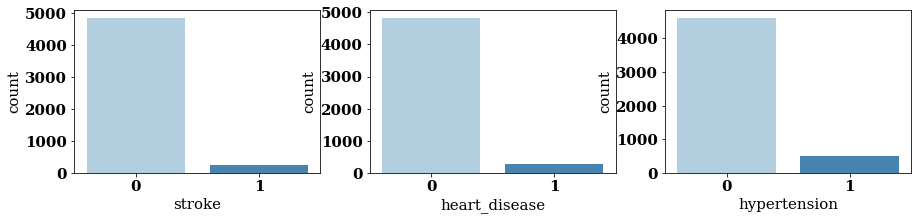

In [235]:
# Create a countplot fot the target and features with two numeric options 
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,3))

sns.countplot(data=df,x='hypertension', palette='Blues', ax=axes[2])
sns.countplot(data=df,x='heart_disease',palette='Blues', ax=axes[1])
sns.countplot(data=df,x='stroke',palette='Blues', ax=axes[0])

plt.rcParams.update( {'font.family':'serif', 'font.size':5,
                      'font.weight':'bold'})

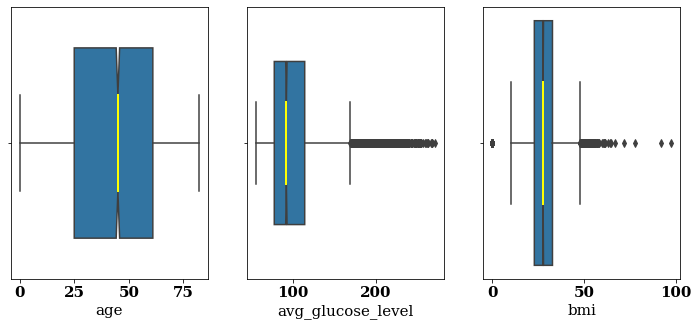

In [248]:
#Creat a univariate boxplot for columns with different numeric ranges
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12,5))

sns.boxplot(data=df, x='age',medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),notch=True,
            width = .7,ax=axes[0])
sns.boxplot(data=df, x='avg_glucose_level',medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),notch=True, 
            width = .6,ax=axes[1])
sns.boxplot(data=df, x='bmi',medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),notch=True, 
            width = .9,ax=axes[2])
plt.rcParams.update( {'font.family':'serif', 'font.size':15,
                      'font.weight':'bold'})

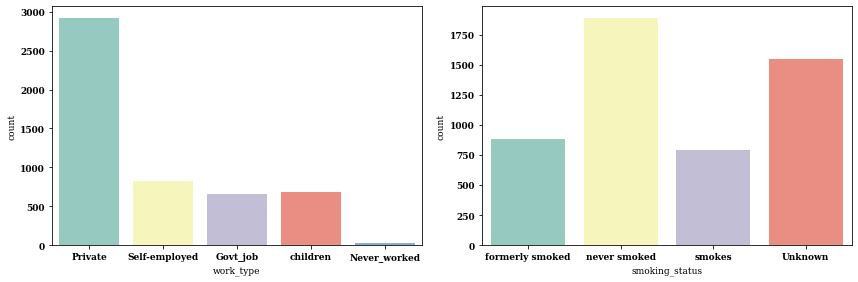

In [254]:
# Create univariate countplot with columns with multiple caterogories
fig, axes = plt.subplots(ncols=2, figsize=(12,4))

sns.countplot(data = df, x='work_type', palette='Set3', ax=axes[0])
sns.countplot(data = df, x='smoking_status', palette='Set3', ax=axes[1])
fig.tight_layout()
plt.rcParams.update( {'font.family':'serif', 'font.size':5,
                      'font.weight':'bold'})

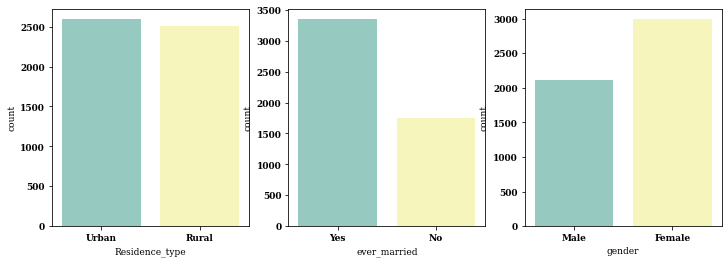

In [253]:
# Create univariate countplot with columns with two caterogories
ig, axes = plt.subplots(ncols=3, figsize=(12,4))

sns.countplot(data = df, x='Residence_type', palette='Set3', ax=axes[0])
sns.countplot(data = df, x='ever_married', palette='Set3', ax=axes[1])
sns.countplot(data = df, x='gender', palette='Set3', ax=axes[2])

plt.rcParams.update( {'font.family':'serif', 'font.size':9,
                      'font.weight':'semibold'})